In [4]:
!pip install transformers datasets

In [5]:
!pip install --upgrade datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.8/494.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [6]:
from datasets import load_dataset

ds = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train_df.csv: 0.00B [00:00, ?B/s]

val_df.csv: 0.00B [00:00, ?B/s]

test_df.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/31232 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5205 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5206 [00:00<?, ? examples/s]

In [7]:
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 31232
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5205
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5206
    })
})

In [8]:
ds['train'][0]

{'id': 9536,
 'text': 'Cooking microwave pizzas, yummy',
 'label': 2,
 'sentiment': 'positive'}

In [9]:
model_checkpoint = "prajjwal1/bert-tiny"

In [10]:
import tensorflow as tf

In [11]:
from transformers import AutoTokenizer ,TFAutoModelForSequenceClassification

In [12]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

In [13]:
tokenizer("the sun rises in the east")

{'input_ids': [101, 1996, 3103, 9466, 1999, 1996, 2264, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [14]:
with tokenizer.as_target_tokenizer():
  print(tokenizer("This is very Bad"))

{'input_ids': [101, 2023, 2003, 2200, 2919, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}


/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3951: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [15]:
print("Tokenizer name:", tokenizer.name_or_path)
print("Vocab size:", tokenizer.vocab_size)
print("Model max length:", tokenizer.model_max_length)
print("Padding token:", tokenizer.pad_token)
print("CLS token:", tokenizer.cls_token)
print("SEP token:", tokenizer.sep_token)
print("UNK token:", tokenizer.unk_token)

Tokenizer name: prajjwal1/bert-tiny
Vocab size: 30522
Model max length: 1000000000000000019884624838656
Padding token: [PAD]
CLS token: [CLS]
SEP token: [SEP]
UNK token: [UNK]


In [16]:
def preprocess_dataset(example):

    tokenized = tokenizer(
        example["text"],
        padding="max_length",
        truncation=True,
        max_length=128
    )
    # Add label
    tokenized["label"] = example["label"]
    return tokenized

In [17]:
preprocess_dataset(ds['train'][0])

{'input_ids': [101, 8434, 18302, 10733, 2015, 1010, 9805, 18879, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
ds['train'][:]['text']

['Cooking microwave pizzas, yummy',
 'Any plans of allowing sub tasks to show up in the widget?',
 " I love the humor, I just reworded it. Like saying 'group therapy' instead`a 'gang banging'. Keeps my moms off my back.   Hahaha",
 ' naw idk what ur talkin about',
 ' That sucks to hear. I hate days like that',
 ' Umm yeah. That`s probably a pretty good note to self because eeeeeewwwwwwww.',
 ' whatever do you mean?',
 ' That would panic me a little!  Maybe you can read on an orbitron at the gym like I do...when all else fails?!?',
 'Is sad when people`s phones are dead',
 '  sad face.',
 'In cafe management, the end of the month is nothing but numbers. My arty little head hurts from finding discrepencies',
 'Basically I`ve listened to Miley Cyrus for fourteen hours now, and I love it.',
 ' what did you think of the finale?  I thought it was kind of a cheap way out',
 ' I think that boat sailed my friend... The few CCO`s that had them, had them months ago....  I wish you luck though...'

In [19]:
train_dataset= ds["train"].select(range(10000))

In [20]:
tokenized_dataset_train = train_dataset.map(preprocess_dataset, batched=True)

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [21]:
tokenized_dataset_test = ds['validation'].map(preprocess_dataset,batched = True)

Map:   0%|          | 0/5205 [00:00<?, ? examples/s]

In [22]:
tokenized_dataset_train.rename_column('label','labels')

Dataset({
    features: ['id', 'text', 'labels', 'sentiment', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 10000
})

In [23]:
tokenized_dataset_test.rename_column('label','labels')

Dataset({
    features: ['id', 'text', 'labels', 'sentiment', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 5205
})

In [24]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [25]:
tf_train = tokenized_dataset_train.to_tf_dataset(
    columns = ['input_ids','attention_mask'],
    label_cols = ['labels'],
    shuffle = True,
    collate_fn = data_collator,
    batch_size = 16
)

/usr/local/lib/python3.11/dist-packages/datasets/arrow_dataset.py:403: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [26]:
tf_train

<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 128), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 128), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [27]:
tokenized_dataset_test

Dataset({
    features: ['id', 'text', 'label', 'sentiment', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 5205
})

In [28]:
tf_test = tokenized_dataset_test.to_tf_dataset(
    columns = ['input_ids','attention_mask'],
    label_cols = ['labels'],
    shuffle = True,
    collate_fn = data_collator,
    batch_size = 16
)

In [29]:
from transformers import AdamWeightDecay

optimizer = AdamWeightDecay(
    learning_rate=2e-5,    # Very important: small LR for transformers
    weight_decay_rate=0.01
)

In [30]:
model = TFAutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=5, from_pt=True)

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should p

In [31]:
model.compile(optimizer = optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['accuracy'])

In [32]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  4385920   
                                                                 
 dropout_7 (Dropout)         multiple                  0         
                                                                 
 classifier (Dense)          multiple                  645       
                                                                 
Total params: 4386565 (16.73 MB)
Trainable params: 4386565 (16.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.fit(tf_train,validation_data = tf_test,epochs = 5)

Epoch 1/5
625/625 [==============================] - 31s 24ms/step - loss: 1.2757 - accuracy: 0.3667 - val_loss: 1.1501 - val_accuracy: 0.4190
Epoch 2/5
625/625 [==============================] - 17s 27ms/step - loss: 1.0604 - accuracy: 0.5234 - val_loss: 0.9483 - val_accuracy: 0.6165
Epoch 3/5
625/625 [==============================] - 14s 23ms/step - loss: 0.8870 - accuracy: 0.6378 - val_loss: 0.8396 - val_accuracy: 0.6488
Epoch 4/5
625/625 [==============================] - 14s 23ms/step - loss: 0.7921 - accuracy: 0.6785 - val_loss: 0.8024 - val_accuracy: 0.6594
Epoch 5/5
625/625 [==============================] - 24s 39ms/step - loss: 0.7446 - accuracy: 0.6951 - val_loss: 0.7722 - val_accuracy: 0.6695


In [34]:
model.save_pretrained("Text Sentiment Analysis")
tokenizer.save_pretrained('Text Sentiment Analysis')

('Text Sentiment Analysis/tokenizer_config.json',
 'Text Sentiment Analysis/special_tokens_map.json',
 'Text Sentiment Analysis/vocab.txt',
 'Text Sentiment Analysis/added_tokens.json',
 'Text Sentiment Analysis/tokenizer.json')

# Evaluation Of Model

In [35]:
model = TFAutoModelForSequenceClassification.from_pretrained("/content/Text Sentiment Analysis")
tokenizer = AutoTokenizer.from_pretrained("/content/Text Sentiment Analysis")

Some layers from the model checkpoint at /content/Text Sentiment Analysis were not used when initializing TFBertForSequenceClassification: ['dropout_7']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/Text Sentiment Analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [36]:
val_dataset = ds["test"].select(range(3000))

In [37]:
val_dataset['text']

Column(['getting cds ready for tour', ' MC, happy mother`s day to your mom ;).. love yah', 'A year from now is graduation....i am pretty sure i`m not ready for it!?!?!?', ' because you had chips and sale w/o me', 'Great for organising my work life balance'])

In [38]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Tokenize the test data
texts = list(val_dataset['text'])
test_encodings = tokenizer(
    texts,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="tf"
)
preds = model.predict(dict(test_encodings))

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


94/94 [==============================] - 1s 8ms/step


In [39]:
preds.logits.shape

(3000, 5)

In [40]:
pred_labels = np.argmax(preds.logits, axis=1)

In [41]:
test_labels = val_dataset['label']

In [42]:
if test_labels is not None:
    print("Accuracy:", accuracy_score(test_labels, pred_labels))
    print("F1 Score (macro):", f1_score(test_labels, pred_labels, average='macro'))
    print("\nClassification Report:\n", classification_report(test_labels, pred_labels))

Accuracy: 0.6776666666666666
F1 Score (macro): 0.6791600212092481

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.67       907
           1       0.62      0.60      0.61      1098
           2       0.74      0.76      0.75       995

    accuracy                           0.68      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.68      0.68      0.68      3000



In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

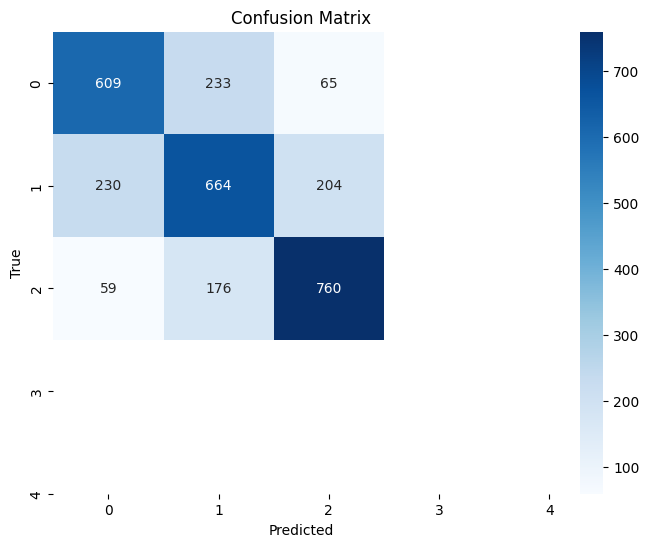

In [44]:

# STEP 3: Confusion Matrix
cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(5), yticklabels=range(5))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



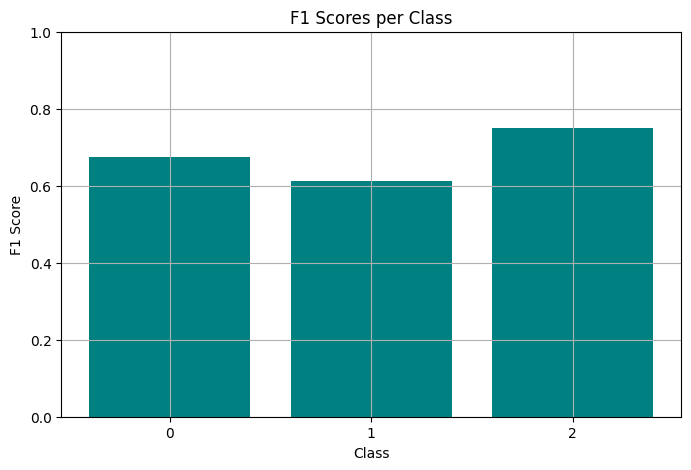

In [45]:
# STEP 4: Classification Report (and F1 scores)
labels = [0, 1, 2]
report = classification_report(test_labels, pred_labels, labels=labels, output_dict=True, zero_division=0)

# STEP 2: Plot F1-scores
f1_scores = [report[str(i)]['f1-score'] for i in labels]

plt.figure(figsize=(8, 5))
plt.bar(labels, f1_scores, color='teal')
plt.title("F1 Scores per Class")
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.xticks(labels)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Prediction For The Model

In [46]:
new_texts = [
    "I absolutely love this product!",
    "Worst experience ever. Do not buy.",
    "It was okay, not great but not terrible."
]

# Tokenize
inputs = tokenizer(new_texts, padding=True, truncation=True, return_tensors="tf")

# Predict
outputs = model(inputs)
predictions = tf.argmax(outputs.logits, axis=1).numpy()

# View predictions
for text, pred in zip(new_texts, predictions):
    print(f"Text: {text}\nPredicted class: {pred}\n")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Text: I absolutely love this product!
Predicted class: 2

Text: Worst experience ever. Do not buy.
Predicted class: 0

Text: It was okay, not great but not terrible.
Predicted class: 0



In [65]:
def func(text):
  inputs = tokenizer(text, padding=True, truncation=True, return_tensors="tf")
  outputs = model(inputs)
  predictions = tf.argmax(outputs.logits, axis=1).numpy()
  d = {0:'negative',1:'neutral',2:'positive'}
  return (d[predictions[0]])

In [66]:
text = "shut your mouth"
func(text)

'negative'

In [68]:
text = 'hello there myself xyz manager of abc company'

In [69]:
func(text)

'neutral'

In [72]:
text = 'I think you are happy now'
func(text)

'positive'

In [49]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 128.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.5 MB/s eta 0:00:00


In [50]:
func(text)

negative


In [63]:
!pip install gradio --quiet

In [67]:
import gradio as gr

iface = gr.Interface(
    fn=func,
    inputs=gr.Textbox(lines=2, placeholder="Enter text here..."),
    outputs="text",
    title="Sentiment Predictor",
    description="Enter a sentence and get the sentiment."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e4ffb612c36f6ff893.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
